In [1]:
import cv2
import helpers
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

In [2]:
image_dir_training = 'day_night_images/training/'
image_dir_test = 'day_night_images/test/'

In [3]:
#load the dataset
IMAGE_LIST = helpers.load_dataset(image_dir_training)

In [4]:
IMAGE_STANDALIZED_LIST = helpers.standardize(IMAGE_LIST)

Shape:  (600, 1100, 3)
Label(0 = night, 1 = day): 1


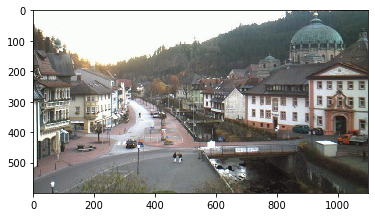

In [7]:
#visualize the standalized image
image_num = 0

selected_image = IMAGE_STANDALIZED_LIST[image_num][0]
selected_label = IMAGE_STANDALIZED_LIST[image_num][1]

plt.imshow(selected_image)
print("Shape: ", selected_image.shape)
print("Label(0 = night, 1 = day): " + str(selected_label))

In [9]:
#find the average brightness using V channel
def avg_brightness(rgb_image):
    #convert image to hsv
    hsv = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)
    #add up all the pixel values in V channel
    sum_brightness = np.sum(hsv[:,:,2])
    area = 600 * 1100.0
    
    avg = sum_brightness / area
    
    return avg

Shape:  (600, 1100, 3)
average_brightness:  128.0701409090909


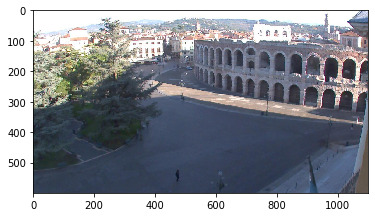

In [10]:
#testing average brightness level
image_num = 10

test_im = IMAGE_STANDALIZED_LIST[image_num][0]

avg = avg_brightness(test_im)
print("Shape: ", test_im.shape)
print("average_brightness: ", avg)
plt.imshow(test_im)

In [24]:
#build classifier
def estimate_label(rgb_image):
    avg = avg_brightness(rgb_image)
    
    predicted_label = 0
    threshold = 120
    
    if (avg > threshold):
        predicted_label = 1
    else:
        predicted_label = 0
        
    return predicted_label

In [25]:
import random

TEST_IMAGE_LIST = helpers.load_dataset(image_dir_test)

STANDALIZED_TEST_IMAGE_LIST = helpers.standardize(TEST_IMAGE_LIST)

#shuffle the standalized test image list
random.shuffle(STANDALIZED_TEST_IMAGE_LIST)

In [26]:
def get_misclssified_image(test_images):
    #track misclassified image by placing them into list
    misclassified_images_label = []
    
    for image in test_images:
        im = image[0]
        true_label = image[1]
        
        predicted_label = estimate_label(im)
        
        if (predicted_label != true_label):
            misclassified_images_label.append((im, predicted_label, true_label))
            
    return misclassified_images_label

In [36]:
#find all misclassified images in all a given test set
MISCLASSIFIED = get_misclssified_image(STANDALIZED_TEST_IMAGE_LIST)

#Acculacy calculation
total = len(STANDALIZED_TEST_IMAGE_LIST)
num_correct = total - len(MISCLASSIFIED)
accuracy = num_correct / total


print("accuracy: ", accuracy)
print("number of misclassified images: "+ str(len(MISCLASSIFIED)) +' out of ' +str(total))

accuracy:  0.86875
number of misclassified images: 21 out of 160


predicted label: 1


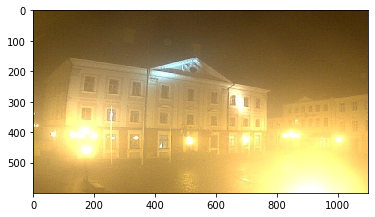

In [37]:
#visualize misclassified images
num = 0
test_mis_im = MISCLASSIFIED[num][0]
plt.imshow(test_mis_im)
print("predicted label: " +str(MISCLASSIFIED[num][1]))